In [1]:
import numpy as np
import pandas as pd
import os,glob
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:
def LMSQ(x,y):
    n   = len(x)
    sx  = np.sum(x)
    sy  = np.sum(y)
    sxx = np.dot(x,x)
    sxy = np.dot(x,y)
    syy = np.dot(y,y)
    
    denom  = (n*sxx-sx*sx)
    b      = (n*sxy - sx*sy)/denom
    a      = (sy-b*sx)/n
    estim  = np.array([a,b], dtype = float)

    sigma2 = syy + n*a*a + b*b*sxx + 2*a*b*sx - 2*a*sy - 2*b*sxy
    cov    = sigma2 / denom * np.array([[sxx,-sx],[-sx,n]], dtype = float)

    return estim,cov

In [3]:
data   = pd.DataFrame()
growth = pd.DataFrame()
count  = {}

for datafile in glob.glob('../ExperimentalData/KillCurves/ctx?.data'):
    x = np.genfromtxt(datafile, delimiter = '\t')
    for row in x:
        if not row[0] in count.keys(): count[row[0]] = 1
        else:                          count[row[0]] += 1
        
        t       = np.arange(len(row[1:])) / 6.
        fit,cov = LMSQ(t,np.log(row[1:]))
        
        data[(row[0],count[row[0]])]   = row[1:]
        growth[(row[0],count[row[0]])] = np.concatenate([fit, cov.flatten()[[0,3,1]]])
        
growth.index = ['logN0', 'alpha', 'Var[logN0]', 'Var[alpha]', 'Cov[logN0,alpha]']

In [4]:
data

,"(64.0, 1)","(32.0, 1)","(16.0, 1)","(8.0, 1)","(2.0, 1)","(0.25, 1)","(0.0625, 1)","(0.0, 1)","(0.02, 1)","(0.01, 1)",...,"(0.00078, 2)","(0.0, 6)","(0.4, 2)","(0.2, 2)","(0.1, 2)","(0.06, 2)","(0.04, 2)","(0.03, 2)","(0.02, 3)","(0.0, 7)"
0,1150000.0,1250000.0,1330000.0,1100000.0,1250000.0,1420000.0,1320000.0,1210000.0,60000.0,66000.0,...,350000.0,310000.0,900000.0,970000.0,760000.0,670000.0,760000.0,980000.0,880000.0,1040000.0
1,1080000.0,400000.0,380000.0,1750000.0,300000.0,620000.0,1020000.0,1240000.0,86000.0,56000.0,...,450000.0,610000.0,410000.0,520000.0,650000.0,680000.0,620000.0,1110000.0,970000.0,780000.0
2,58000.0,170000.0,370000.0,530000.0,330000.0,520000.0,600000.0,670000.0,53000.0,51000.0,...,640000.0,370000.0,800000.0,470000.0,440000.0,760000.0,370000.0,750000.0,550000.0,670000.0
3,10000.0,29000.0,105000.0,221000.0,380000.0,420000.0,450000.0,1620000.0,45000.0,71000.0,...,670000.0,600000.0,340000.0,480000.0,420000.0,490000.0,480000.0,500000.0,670000.0,1170000.0
4,1000.0,7400.0,49000.0,47000.0,148000.0,135000.0,340000.0,1110000.0,28000.0,60000.0,...,1010000.0,880000.0,204000.0,287000.0,147000.0,159000.0,290000.0,410000.0,470000.0,800000.0
5,200.0,900.0,1400.0,8500.0,157000.0,141000.0,190000.0,1340000.0,29000.0,72000.0,...,900000.0,970000.0,310000.0,240000.0,350000.0,240000.0,194000.0,160000.0,204000.0,620000.0
6,500.0,500.0,700.0,5100.0,20000.0,173000.0,235000.0,2220000.0,25000.0,82000.0,...,1890000.0,1990000.0,191000.0,250000.0,250000.0,226000.0,192000.0,250000.0,270000.0,1080000.0


In [5]:
growth

,"(64.0, 1)","(32.0, 1)","(16.0, 1)","(8.0, 1)","(2.0, 1)","(0.25, 1)","(0.0625, 1)","(0.0, 1)","(0.02, 1)","(0.01, 1)",...,"(0.00078, 2)","(0.0, 6)","(0.4, 2)","(0.2, 2)","(0.1, 2)","(0.06, 2)","(0.04, 2)","(0.03, 2)","(0.02, 3)","(0.0, 7)"
logN0,14.257146,14.326114,14.690701,14.859190,13.836323,13.901886,14.048401,13.790047,11.239608,10.936325,...,12.768336,12.648403,13.560769,13.579123,13.459133,13.623160,13.531566,14.019069,13.859001,13.679727
alpha,-9.529445,-8.314309,-7.688123,-6.256889,-3.107669,-2.276965,-1.951383,0.531560,-1.165414,0.282073,...,1.478942,1.579724,-1.409148,-1.308672,-1.214999,-1.480189,-1.434603,-1.837730,-1.461437,-0.036127
Var[logN0],2.748470,0.346248,2.072369,0.962956,0.967722,0.314067,0.079443,0.271263,0.098963,0.045443,...,0.070453,0.194589,0.312213,0.078104,0.341684,0.340277,0.073283,0.204857,0.176084,0.169854
Var[alpha],7.611148,0.958841,5.738868,2.666648,2.679845,0.869723,0.219996,0.751191,0.274052,0.125843,...,0.195099,0.538861,0.864590,0.216288,0.946201,0.942306,0.202937,0.567297,0.487618,0.470365
"Cov[logN0,alpha]",-3.805574,-0.479421,-2.869434,-1.333324,-1.339923,-0.434861,-0.109998,-0.375595,-0.137026,-0.062922,...,-0.097550,-0.269430,-0.432295,-0.108144,-0.473101,-0.471153,-0.101469,-0.283649,-0.243809,-0.235183


(10000.0, 10000000.0)

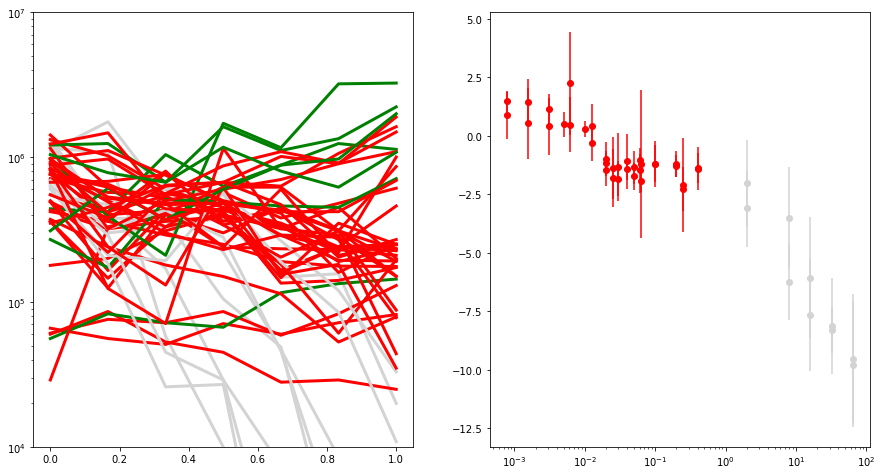

In [6]:
threshold = 1.0
fig,ax = plt.subplots(1,2, figsize = (15,8))

for c in data.columns:
    if c[0] == 0:
        col = 'green'
    elif c[0] < threshold:
        col = 'red'
    else:
        col = 'lightgray'
    ax[0].plot(t, data[c] , c = col, lw  = 3)
    ax[1].errorbar(c[0], growth[c]['alpha'], yerr = np.sqrt(growth[c]['Var[alpha]']), marker = 'o', c = col)

ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[0].set_ylim([1e4,1e7])




In [7]:
def HillFunction(x, alpha0, logmu, gamma, kappa):
    bmk = np.exp(kappa * (x-logmu))
    return alpha0 * (1 - bmk)/(1 + bmk/gamma)



alpha0 = 0.9992777676523711
mu     = 0.01243168863896527
gamma  = 1.491902454521134
kappa  = 5.515947346001122


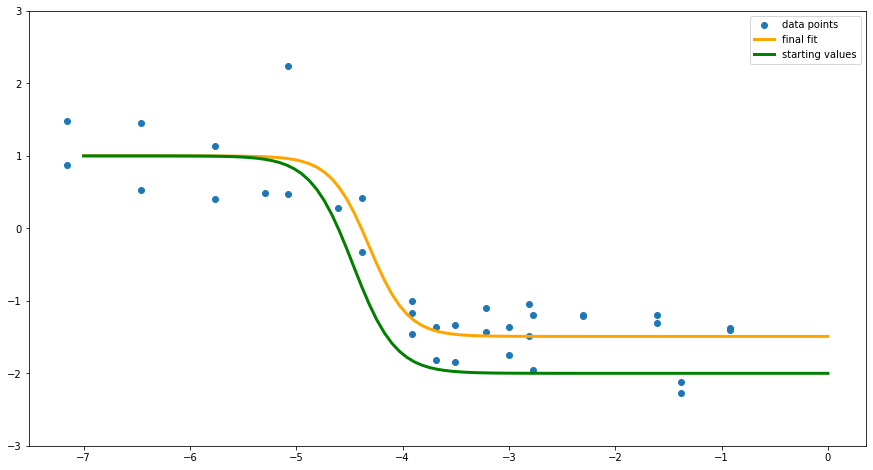

In [8]:
p0 = [1,np.log(1e-2), 2, 5]
b0 = []
gr = []

for c in growth.columns:
    if c[0] < threshold and c[0] > 0:
        b0.append(c[0])
        gr.append(growth[c]['alpha'])

L0       = np.log(np.array(b0))
gr       = np.array(gr)

fit, cov = curve_fit(HillFunction, L0, gr, p0 = p0)

# output
print('alpha0 = {}\nmu     = {}\ngamma  = {}\nkappa  = {}'.format(fit[0],np.exp(fit[1]), fit[2], fit[3]))


# checking results
fig,ax = plt.subplots(1,1,figsize = (15,8))
x      = np.linspace(-7,0,100)

ax.scatter(L0, gr, label = 'data points')
ax.plot(x,HillFunction(x,fit[0],fit[1],fit[2],fit[3]), label = 'final fit', c = 'orange', lw = 3)
ax.plot(x,HillFunction(x,p0[0],p0[1],p0[2],p0[3]), label = 'starting values', c = 'green', lw = 3)

ax.set_ylim([-3,3])
ax.legend()